#Dataset
SFO Air Traffic Passenger and Cargo Statistics

Link do Kaggle: https://www.kaggle.com/rajsengo/sfo-air-traffic-passenger-and-cargo-statistics

Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

Carregando o dataset

In [ ]:
data = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

Análise dos dados

In [ ]:
data.head()

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,price_category,terminal,boarding_area,passenger_count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
print(data.shape)          #retorna dimensionalidade do dataframe
print(data.isnull().sum()) #retorna soma dos valores nulos encontrados

(22869, 12)
activity_period            0
operating_airline          0
operating_airline_iata    74
published_airline          0
published_airline_iata    74
geo_summary                0
geo_region                 0
activity_type              0
price_category             0
terminal                   0
boarding_area              0
passenger_count            0
dtype: int64


Especificando features e rótulos e lidando com variáveis categóricas

In [ ]:
X_, y = data.drop(columns=['passenger_count']), data['passenger_count']
X = pd.get_dummies(X_)
X

,activity_period,operating_airline_ABC Aerolineas S.A. de C.V. dba Interjet,operating_airline_ATA Airlines,operating_airline_Aer Lingus,operating_airline_Aeromexico,operating_airline_Air Berlin,operating_airline_Air Canada,operating_airline_Air Canada Jazz,operating_airline_Air China,operating_airline_Air France,operating_airline_Air India Limited,operating_airline_Air Italy S.P.A,operating_airline_Air New Zealand,operating_airline_Air Pacific Limited dba Fiji Airways,operating_airline_AirTran Airways,operating_airline_Alaska Airlines,operating_airline_All Nippon Airways,operating_airline_Allegiant Air,operating_airline_American Airlines,operating_airline_American Eagle Airlines,operating_airline_Ameriflight,operating_airline_Asiana Airlines,operating_airline_Atlantic Southeast Airlines,"operating_airline_Atlas Air, Inc",operating_airline_BelAir Airlines,operating_airline_Boeing Company,operating_airline_British Airways,"operating_airline_COPA Airlines, Inc.",operating_airline_Cathay Pacific,operating_airline_China Airlines,operating_airline_China Eastern,operating_airline_China Southern,operating_airline_Compass Airlines,operating_airline_Delta Air Lines,operating_airline_EVA Airways,operating_airline_El Al Israel Airlines LTD.,operating_airline_Emirates,operating_airline_Etihad Airways,operating_airline_Evergreen International Airlines,operating_airline_ExpressJet Airlines,...,published_airline_iata_UA,published_airline_iata_US,published_airline_iata_VS,published_airline_iata_VX,published_airline_iata_WN,published_airline_iata_WO,published_airline_iata_WS,published_airline_iata_WW,published_airline_iata_XP,published_airline_iata_Y4,published_airline_iata_YX,geo_summary_Domestic,geo_summary_International,geo_region_Asia,geo_region_Australia / Oceania,geo_region_Canada,geo_region_Central America,geo_region_Europe,geo_region_Mexico,geo_region_Middle East,geo_region_South America,geo_region_US,activity_type_Deplaned,activity_type_Enplaned,activity_type_Thru / Transit,price_category_Low Fare,price_category_Other,terminal_International,terminal_Other,terminal_Terminal 1,terminal_Terminal 2,terminal_Terminal 3,boarding_area_A,boarding_area_B,boarding_area_C,boarding_area_D,boarding_area_E,boarding_area_F,boarding_area_G,boarding_area_Other
0,200507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,200507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,200507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,200507,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,200507,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,202012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
22865,202012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
22866,202012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
22867,202012,0,0,

Separando dados em 80% para treino e 20% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Teste de redução de dimensionalidade com PCA nos dados

In [ ]:
scaler_std = preprocessing.StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([2.46583465e-02, 1.73028546e-02, 1.58952352e-02, 1.43140344e-02,
       1.37956268e-02, 1.36546610e-02, 1.35194658e-02, 1.34159402e-02,
       1.31378956e-02, 1.29877048e-02, 1.24903969e-02, 1.23924383e-02,
       1.20276600e-02, 1.18612036e-02, 1.13523987e-02, 1.12169309e-02,
       1.10698173e-02, 1.09270003e-02, 1.08698480e-02, 1.08497079e-02,
       1.08492003e-02, 1.08468526e-02, 1.08447423e-02, 1.08443257e-02,
       1.08434810e-02, 1.08427287e-02, 1.08421624e-02, 1.08412911e-02,
       1.08401882e-02, 1.08394549e-02, 1.08366785e-02, 1.08366310e-02,
       1.08158754e-02, 1.08046484e-02, 1.07961467e-02, 1.07848197e-02,
       1.07755428e-02, 1.07694050e-02, 1.07655725e-02, 1.07553583e-02,
       1.07543909e-02, 1.07512352e-02, 1.07470491e-02, 1.07376479e-02,
       1.07313610e-02, 1.07290091e-02, 1.07272927e-02, 1.07187350e-02,
       1.07146839e-02, 1.07075409e-02, 1.07031762e-02, 1.07016732e-02,
       1.06984529e-02, 1.06952777e-02, 1.06917616e-02, 1.06901544e-02,
      

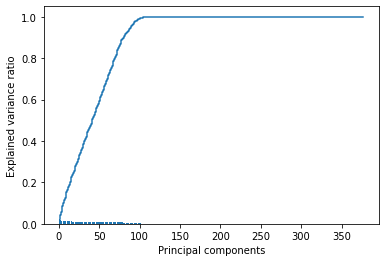

In [ ]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

Métricas a serem utilizadas

In [ ]:
metricas = ["explained_variance",
            "neg_mean_absolute_error",
            "neg_mean_squared_error",
            "neg_median_absolute_error",
            "r2"
            ]

#Utilizando Pipeline

#Algoritmo KNN

Definindo valores para k

In [ ]:
neighbors = np.arange(1, 11)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
pipe_knn = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('knn', KNeighborsRegressor()),
])

In [ ]:
pipe_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'knn', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

Parâmetros para Grid Search

In [ ]:
param_grid_knn = {"knn__n_neighbors": neighbors}

#Utilizando Grid Search

In [ ]:
grid_knn = GridSearchCV(pipe_knn,
                    param_grid=param_grid_knn,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler_std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
           

Mostrando os resultados

In [ ]:
results = pd.DataFrame(grid_knn.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
1,2.893859,0.013021,0.946264,0.017994,2,{'knn__n_neighbors': 2},0.962158,0.969059,0.970221,0.980008,0.976780,0.971645,0.006245,2,-3720.364034,-3720.348183,-3701.417600,-3391.405985,-3448.869637,-3596.481088,145.290503,1,-1.371857e+08,-1.243855e+08,-1.264607e+08,-7.450465e+07,-8.177516e+07,-1.088623e+08,2.556188e+07,2,-1089.500000,-1036.000000,-1091.5,-1129.000000,-1115.500000,-1092.30,31.822319,1,0.962076,0.968906,0.970192,0.980002,0.976767,0.971589,0.006281,2
0,2.949250,0.049103,0.890297,0.014952,1,{'knn__n_neighbors': 1},0.962947,0.969382,0.976025,0.977680,0.977156,0.972638,0.005689,1,-3775.682973,-3710.110686,-3728.694179,-3554.724788,-3439.528560,-3641.748237,125.409261,2,-1.340352e+08,-1.228964e+08,-1.017266e+08,-8.316379e+07,-8.041615e+07,-1.044476e+08,2.123061e+07,1,-1078.000000,-1051.000000,-1152.0,-1106.000000,-1132.000000,-1103.80,36.267892,2,0.962947,0.969278,0.976022,0.977678,0.977153,0.972616,0.005700,1
2,2.913818,0.043804,0.993548,0.022546,3,{'knn__n_neighbors': 3},0.950789,0.963616,0.960251,0.976636,0.971001,0.964458,0.008904,3,-4171.044001,-4066.392548,-4243.157967,-3719.012481,-3850.064590,-4009.934317,196.840533,3,-1.788163e+08,-1.463944e+08,-1.690774e+08,-8.718997e+07,-1.022037e+08,-1.367364e+08,3.621407e+07,3,-1193.666667,-1123.666667,-1215.0,-1244.333333,-1196.333333,-1194.60,39.812003,3,0.950568,0.963404,0.960147,0.976597,0.970963,0.964336,0.008969,3
3,2.886739,0.040798,1.041119,0.032350,4,{'knn__n_neighbors': 4},0.943337,0.959791,0.953602,0.970278,0.963950,0.958192,0.009203,4,-4476.686321,-4367.814772,-4643.037305,-4019.970074,-4225.648948,-4346.631484,212.867966,4,-2.061441e+08,-1.619428e+08,-1.974853e+08,-1.108847e+08,-1.271781e+08,-1.607270e+08,3.748373e+07,4,-1251.000000,-1265.750000,-1308.5,-1300.000000,-1243.000000,-1273.65,26.167537,4,0.943013,0.959517,0.953451,0.970237,0.963867,0.958017,0.009293,4
4,4.176001,1.128888,1.642202,0.422846,5,{'knn__n_neighbors': 5},0.936457,0.957505,0.950520,0.967539,0.957643,0.953933,0.010283,5,-4685.642689,-4571.041268,-4935.351790,-4280.898715,-4432.212080,-4581.029309,223.075360,5,-2.310366e+08,-1.708652e+08,-2.104520e+08,-1.210513e+08,-1.493823e+08,-1.765575e+08,3.992153e+07,5,-1266.200000,-1323.600000,-1372.8,-1353.400000,-1290.000000,-1321.20,39.252006,5,0.936132,0.957287,0.950395,0.967508,0.957558,0.953776,0.010373,5


In [ ]:
score_knn = grid_knn.best_score_
score_knn

-3596.4810877288874

Usando predict

In [ ]:
model_1 = grid_knn.best_estimator_
y_pred_knn = model_1.predict(X_test)

#Algoritmo SVM

Utilizando Pipeline

In [ ]:
pipe_svm = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('svm', SVC()),
])

In [ ]:
pipe_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'svm', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'svm__C', 'svm__break_ties', 'svm__cache_size', 'svm__class_weight', 'svm__coef0', 'svm__decision_function_shape', 'svm__degree', 'svm__gamma', 'svm__kernel', 'svm__max_iter', 'svm__probability', 'svm__random_state', 'svm__shrinking', 'svm__tol', 'svm__verbose'])

Parâmetros para Grid Search

In [ ]:
C = np.logspace(3, -3, num=10, endpoint=False)
param_grid_svm = {"svm__C": C}

Utilizando Grid Search

In [ ]:
grid_svm = GridSearchCV(pipe_svm,
                    param_grid=param_grid_svm,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_svm.fit(X_train, y_train)

Mostrando resultados

In [ ]:
results = pd.DataFrame(grid_svm.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

Melhor score

In [ ]:
score_svm = grid_svm.best_score_

Usando predict

In [ ]:
model_2 = grid_svm.best_estimator_
y_pred_svm = model_2.predict(X_test)

#Algoritmo Decision Tree

In [ ]:
pipe_tree = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('DecisionTree', tree.DecisionTreeRegressor()),
])

In [ ]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'DecisionTree', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'DecisionTree__ccp_alpha', 'DecisionTree__criterion', 'DecisionTree__max_depth', 'DecisionTree__max_features', 'DecisionTree__max_leaf_nodes', 'DecisionTree__min_impurity_decrease', 'DecisionTree__min_impurity_split', 'DecisionTree__min_samples_leaf', 'DecisionTree__min_samples_split', 'DecisionTree__min_weight_fraction_leaf', 'DecisionTree__presort', 'DecisionTree__random_state', 'DecisionTree__splitter'])

Parâmetros para o Grid Search

In [ ]:
minSamplesSplit = np.arange(1,5)
minSamplesLeaf = np.arange(1,5)

param_grid_tree = {'DecisionTree__min_samples_split':minSamplesSplit,
                   'DecisionTree__min_samples_leaf': minSamplesLeaf
}

#Utilizando Grid Search

In [ ]:
grid_tree = GridSearchCV(pipe_tree,
                    param_grid=param_grid_tree,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler_std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
           

Mostrando Resultados

In [ ]:
results = pd.DataFrame(grid_tree.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DecisionTree__min_samples_leaf,param_DecisionTree__min_samples_split,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
2,7.373779,1.057830,0.103462,0.007465,1,3,"{'DecisionTree__min_samples_leaf': 1, 'Decisio...",0.949733,0.974349,0.969472,0.975437,0.976830,0.969164,0.010026,3,-3911.734900,-3691.403526,-3869.562585,-3637.019814,-3488.623121,-3719.668789,155.157610,1,-1.818560e+08,-1.028461e+08,-1.295159e+08,-9.151654e+07,-8.155447e+07,-1.174578e+08,3.596671e+07,3,-1095.0,-1063.000000,-1147.5,-1120.0,-1130.500000,-1111.200000,29.506948,2,0.949727,0.974290,0.969472,0.975436,0.976829,0.969151,0.010022,3
1,7.471850,0.840381,0.103547,0.006918,1,2,"{'DecisionTree__min_samples_leaf': 1, 'Decisio...",0.948074,0.976300,0.975186,0.971635,0.975507,0.969341,0.010753,2,-3896.465974,-3667.050560,-3830.653457,-3752.890407,-3496.985788,-3728.809237,139.008759,2,-1.878382e+08,-9.507618e+07,-1.052738e+08,-1.056769e+08,-8.620702e+07,-1.160144e+08,3.662722e+07,2,-1078.0,-1057.000000,-1161.0,-1114.0,-1113.000000,-1104.600000,35.533646,1,0.948074,0.976233,0.975186,0.971635,0.975507,0.969327,0.010745,2
3,6.719053,0.397282,0.112858,0.014866,1,4,"{'DecisionTree__min_samples_leaf': 1, 'Decisio...",0.953130,0.974249,0.973688,0.977980,0.974944,0.970798,0.008958,1,-3944.456227,-3731.235037,-3924.441150,-3548.278081,-3658.700282,-3761.422155,152.951041,3,-1.695980e+08,-1.031809e+08,-1.116330e+08,-8.206133e+07,-8.820019e+07,-1.109347e+08,3.115290e+07,1,-1095.0,-1067.000000,-1138.5,-1109.0,-1157.666667,-1113.433333,31.938761,3,0.953116,0.974207,0.973687,0.977974,0.974941,0.970785,0.008959,1
7,8.190604,1.725444,0.136230,0.051671,2,4,"{'DecisionTree__min_samples_leaf': 2, 'Decisio...",0.948441,0.963475,0.970316,0.972505,0.975049,0.965957,0.009566,4,-4086.142389,-3924.659288,-4148.313792,-3813.365491,-3644.641295,-3923.424451,182.694767,4,-1.865797e+08,-1.461876e+08,-1.259502e+08,-1.024373e+08,-8.782129e+07,-1.297952e+08,3.469362e+07,4,-1110.5,-1081.000000,-1171.0,-1178.5,-1163.500000,-1140.900000,38.321534,4,0.948422,0.963456,0.970313,0.972505,0.975049,0.965949,0.009573,4
6,9.881660,0.715941,0.146168,0.025466,2,3,"{'DecisionTree__min_samples_leaf': 2, 'Decisio...",0.953055,0.964435,0.961766,0.972402,0.975129,0.965357,0.007877,5,-4018.526373,-3911.805457,-4250.437278,-3815.138289,-3648.704473,-3928.922374,201.575092,5,-1.699263e+08,-1.423355e+08,-1.622115e+08,-1.028295e+08,-8.754189e+07,-1.329689e+08,3.249833e+07,5,-1110.5,-1080.666667,-1184.5,-1179.5,-1178.666667,-1146.766667,42.889082,6,0.953025,0.964419,0.961765,0.972399,0.975128,0.965347,0.007886,5


Melhor score

In [ ]:
score_tree = grid_tree.best_score_
score_tree

-3719.6687892866903

Usando predict

In [ ]:
model_3 = grid_tree.best_estimator_
y_pred_tree = model_3.predict(X_test)

#Algoritmo Random Forest

Utilizando Pipeline

In [ ]:
pipe_RF = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('RandomForest', RandomForestRegressor()),
])

In [ ]:
pipe_RF.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'RandomForest', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'RandomForest__bootstrap', 'RandomForest__ccp_alpha', 'RandomForest__criterion', 'RandomForest__max_depth', 'RandomForest__max_features', 'RandomForest__max_leaf_nodes', 'RandomForest__max_samples', 'RandomForest__min_impurity_decrease', 'RandomForest__min_impurity_split', 'RandomForest__min_samples_leaf', 'RandomForest__min_samples_split', 'RandomForest__min_weight_fraction_leaf', 'RandomForest__n_estimators', 'RandomForest__n_jobs', 'RandomForest__oob_score', 'RandomForest__random_state', 'RandomForest__verbose', 'RandomForest__warm_start'])

Parâmetros para o Grid Search

In [ ]:
num_estimators = np.arange(100,200)
minSamplesSplit = np.arange(1,5)
minSamplesLeaf = np.arange(1,5)

param_grid_RF = {'RandomForest__n_estimators': num_estimators,
                 'RandomForest__min_samples_split':minSamplesSplit,
                 'RandomForest__min_samples_leaf': minSamplesLeaf
}

Utilizando Grid Search

In [ ]:
grid_RF = GridSearchCV(pipe_RF,
                    param_grid=param_grid_RF,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_RF.fit(X_train, y_train)

Mostrando resultados

In [ ]:
results = pd.DataFrame(grid_RF.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

In [ ]:
score_RF = grid_RF.best_score_
score_RF

Usando predict

In [ ]:
model_4 = grid_RF.best_estimator_
y_pred_RF = model_4.predict(X_test)

#Algoritmo Gradient Boosting

Utilizando Pipeline

In [ ]:
pipe_GB = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('GradientBoosting', GradientBoostingRegressor()),
])

In [ ]:
pipe_GB.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'GradientBoosting', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'GradientBoosting__alpha', 'GradientBoosting__ccp_alpha', 'GradientBoosting__criterion', 'GradientBoosting__init', 'GradientBoosting__learning_rate', 'GradientBoosting__loss', 'GradientBoosting__max_depth', 'GradientBoosting__max_features', 'GradientBoosting__max_leaf_nodes', 'GradientBoosting__min_impurity_decrease', 'GradientBoosting__min_impurity_split', 'GradientBoosting__min_samples_leaf', 'GradientBoosting__min_samples_split', 'GradientBoosting__min_weight_fraction_leaf', 'GradientBoosting__n_estimators', 'GradientBoosting__n_iter_no_change', 'GradientBoosting__presor

Parâmetros para o Grid Search

In [ ]:
num_estimators = np.arange(100,200)
learningRate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

param_grid_GB = {'GradientBoosting__n_estimators': num_estimators,
                 'GradientBoosting__learning_rate': learningRate
}

Utilizando Grid Search

In [ ]:
grid_GB = GridSearchCV(pipe_GB,
                    param_grid=param_grid_GB,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_GB.fit(X_train, y_train)

Mostrando resultados

In [ ]:
results = pd.DataFrame(grid_GB.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

In [ ]:
score_GB = grid_GB.best_score_
score_GB

Utilizando predict

In [ ]:
model_5 = grid_GB.best_estimator_
y_pred_GB = model_5.predict(X_test)

#Algoritmo Perceptron

Utilizando Pipeline

In [ ]:
pipe_perc = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('Perceptron', Perceptron()),
])

In [ ]:
pipe_perc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'Perceptron', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'Perceptron__alpha', 'Perceptron__class_weight', 'Perceptron__early_stopping', 'Perceptron__eta0', 'Perceptron__fit_intercept', 'Perceptron__max_iter', 'Perceptron__n_iter_no_change', 'Perceptron__n_jobs', 'Perceptron__penalty', 'Perceptron__random_state', 'Perceptron__shuffle', 'Perceptron__tol', 'Perceptron__validation_fraction', 'Perceptron__verbose', 'Perceptron__warm_start'])

Parâmetros para o Grid Search

In [ ]:
penalidade = ['None', 'l2', 'l1', 'elasticnet']
alpha = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

param_grid_perc = {'Perceptron__penalty': penalidade,
                 'Perceptron__alpha': alpha
}

Utilizando Grid Search

In [ ]:
grid_perc = GridSearchCV(pipe_perc,
                    param_grid=param_grid_perc,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_perc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

Mostrando resultados

In [ ]:
results = pd.DataFrame(grid_perc.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

In [ ]:
score_perc = grid_perc.best_score_
score_perc

Utilizando predict

In [ ]:
model_6 = grid_perc.best_estimator_
y_pred_perc = model_6.predict(X_test)

#Algoritmo Multi-layer Perceptron

Utilizando Pipeline

In [ ]:
pipe_MLP = Pipeline(steps=[
      ('scaler_std', preprocessing.StandardScaler()), #standardização
      ('PCA', PCA()), #redução de dimensionalidade
      ('imputer', SimpleImputer(strategy='mean')), #substitui valores faltantes pela média
      ('MLPerceptron', MLPRegressor()),
])

In [ ]:
pipe_MLP.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_std', 'PCA', 'imputer', 'MLPerceptron', 'scaler_std__copy', 'scaler_std__with_mean', 'scaler_std__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'MLPerceptron__activation', 'MLPerceptron__alpha', 'MLPerceptron__batch_size', 'MLPerceptron__beta_1', 'MLPerceptron__beta_2', 'MLPerceptron__early_stopping', 'MLPerceptron__epsilon', 'MLPerceptron__hidden_layer_sizes', 'MLPerceptron__learning_rate', 'MLPerceptron__learning_rate_init', 'MLPerceptron__max_fun', 'MLPerceptron__max_iter', 'MLPerceptron__momentum', 'MLPerceptron__n_iter_no_change', 'MLPerceptron__nesterovs_momentum', 'MLPerceptron__power_t', 'MLPerceptron__random_state', 'MLPerceptron__shuffle', 'MLPerceptron__solver', 'MLPerceptron__tol', 'MLPerceptron__validation

In [ ]:
alphaMLP = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

param_grid_MLP = {'MLPerceptron__alpha': alphaMLP}

Utilizando Grid Search

In [ ]:
grid_MLP = GridSearchCV(pipe_MLP,
                    param_grid=param_grid_MLP,
                    scoring=metricas,
                    refit='neg_mean_absolute_error', #retorna modelo já treinado com melhores parâmetros e métrica escolhida
                    cv = 5,
                    verbose = 1, #nível de mensagens que serão emitidas
                    n_jobs = -1,
                    return_train_score=False #não retornar métricas de treino
)

In [ ]:
grid_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler_std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
           

Mostrando resultados

In [ ]:
results = pd.DataFrame(grid_MLP.cv_results_)
results.sort_values(by="rank_test_neg_mean_absolute_error").head() #mostra valores ordenadas pela métrica escolhida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MLPerceptron__alpha,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
3,63.307024,0.426640,0.116377,0.002250,1e-07,{'MLPerceptron__alpha': 1e-07},0.584601,0.571040,0.586943,0.576087,0.581855,0.580105,0.005803,1,-17288.139085,-18415.457187,-18137.548295,-18302.467255,-17513.550431,-17931.432451,447.857622,1,-1.503297e+09,-1.716049e+09,-1.752613e+09,-1.580914e+09,-1.472977e+09,-1.605170e+09,1.117811e+08,1,-3893.347855,-4190.588095,-4504.737266,-4522.411373,-4515.945669,-4325.406052,249.850473,2,0.584426,0.571017,0.586895,0.575665,0.581507,0.579902,0.005811,1
0,62.664992,0.914698,0.113806,0.002783,0.0001,{'MLPerceptron__alpha': 0.0001},0.582673,0.572566,0.583500,0.571631,0.581045,0.578283,0.005120,2,-17533.617686,-18411.104818,-18118.898023,-18372.929046,-17457.899942,-17978.889903,407.768743,2,-1.509695e+09,-1.709873e+09,-1.767020e+09,-1.598115e+09,-1.476037e+09,-1.612148e+09,1.120315e+08,2,-4215.781770,-4332.351879,-4369.620683,-4487.787527,-4315.095472,-4344.127466,88.025287,3,0.582657,0.572561,0.583500,0.571048,0.580638,0.578081,0.005230,2
2,63.406587,0.376441,0.116510,0.003334,1e-06,{'MLPerceptron__alpha': 1e-06},0.584630,0.569221,0.581722,0.572427,0.577889,0.577178,0.005702,4,-17339.428912,-18541.669076,-18172.288903,-18419.619058,-17497.260930,-17994.053376,487.461369,3,-1.502846e+09,-1.723335e+09,-1.774590e+09,-1.594803e+09,-1.487426e+09,-1.616600e+09,1.152861e+08,4,-3900.363145,-4432.020764,-4322.970465,-4557.394939,-4248.516512,-4292.253165,221.932142,1,0.584551,0.569195,0.581715,0.571937,0.577402,0.576960,0.005761,4
4,59.041015,9.306810,0.111280,0.020590,1e-08,{'MLPerceptron__alpha': 1e-08},0.585024,0.570918,0.583439,0.574969,0.574897,0.577849,0.005436,3,-17290.817481,-18423.853548,-18288.643542,-18349.470997,-17638.924560,-17998.342025,451.308869,4,-1.501648e+09,-1.716634e+09,-1.767459e+09,-1.584920e+09,-1.498516e+09,-1.613836e+09,1.103528e+08,3,-4115.050948,-4388.302779,-4443.057729,-4659.407242,-4414.182834,-4404.000306,173.551153,5,0.584882,0.570870,0.583396,0.574590,0.574251,0.577598,0.005517,3
1,65.565107,4.613879,0.112968,0.003262,1e-05,{'MLPerceptron__alpha': 1e-05},0.579906,0.567399,0.581847,0.573890,0.579507,0.576510,0.005270,5,-17418.064925,-18382.764116,-18201.013790,-18540.408739,-17472.481671,-18002.946648,468.153206,5,-1.520314e+09,-1.731049e+09,-1.774042e+09,-1.588547e+09,-1.481699e+09,-1.619130e+09,1.149876e+08,5,-4173.800598,-4334.565170,-4235.303149,-4697.255587,-4284.419384,-4345.068778,183.959510,4,0.579722,0.567267,0.581845,0.573616,0.579029,0.576296,0.005267,5


In [ ]:
score_MLP = grid_MLP.best_score_
score_MLP

-17931.43245061787

Utilizando predict

In [ ]:
model_7 = grid_MLP.best_estimator_
y_pred_MLP = model_7.predict(X_test)

Apresentação dos resultados

In [ ]:
algoritms = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Perceptron', 'Multi-layer Perceptron']
pred = [y_pred_knn, y_pred_svm, y_pred_tree, y_pred_RF, y_pred_GB, y_pred_perc, y_pred_MLP]
best_scores = [score_knn, score_svm, score_tree, score_RF, score_GB, score_perc, score_MLP]

In [ ]:
plt.bar(algoritms, pred)

In [ ]:
plt.bar(algoritms, best_scores)

In [ ]:
algoritms = ['KNN', 'Decision Tree', 'Multi-layer Perceptron']
pred = [y_pred_knn, y_pred_tree,  y_pred_MLP]
best_scores = [score_knn, score_tree, score_MLP]

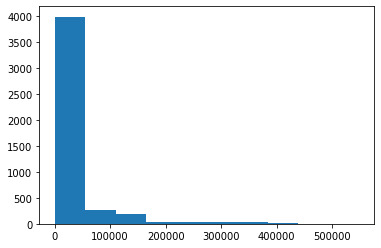

In [ ]:
plt.hist(y_test);

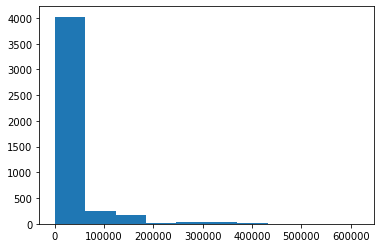

In [ ]:
plt.hist(y_pred_knn);

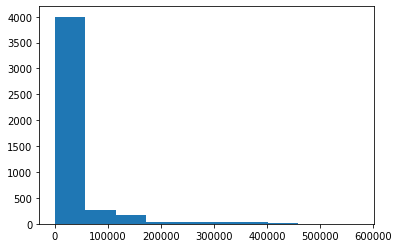

In [ ]:
plt.hist(y_pred_tree);

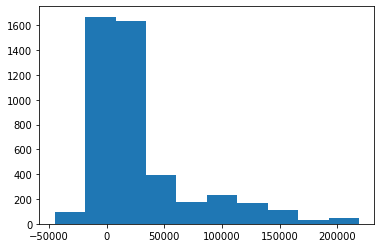

In [ ]:
plt.hist(y_pred_MLP);

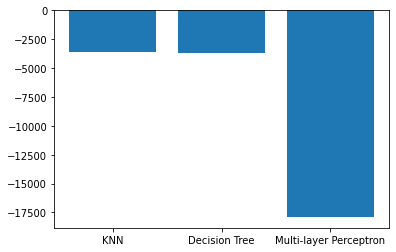

In [ ]:
plt.bar(algoritms, best_scores);